# Intro
Some scripts for visualizing energy modes in 1d systems, written as supplement as I followed along with the [Topocondmat course](https://topocondmat.org/w1_topointro/1D.html).

# Scripts
### majorana_modes.py
Main script. Plot the energy levels for Kitaev or SSH chain. Parameters can also be tweaked via command line args.

### kwant_version.py
Use Kwant package to plot energy levels. (Largely copy-pasted from Topocondmat.)

### Examples:
```
# Plot energies for Kitaev model as mu/t is tuned:
python majorana_modes.py kitaev

# as last-to-first-site hopping is tuned(default mu/t=0)
python majorana_modes.py kitaev --tune x 

# with mu/t set at 3
py majorana_modes.py kitaev --tune x -m 3.0 
```
To do the same for the SSH model, replace `'kitaev'` arg with `'ssh'`. In SSH model case, default tuning parameter is `t2/t1`  (ratio of the two hopping strengths, no cooper-pairing).

#### Optional args:
- `-N` (default `25`): Set number of sites
- `-m` (default `1`): Set onsite-energy mu value (ignored if mu is being tuned)
- `-d` (default `1`): Set value of Cooper pairing
- `-t` (default `1`): Set value of next-neighbor hopping (ignored if ssh model)
- `-x` (default `0.5`): Set parameter tuning last-to-first-site hopping. 
- `-t2` (default `1`): Set value of double-bond hopping (single-bond is always 1)
- `--plot-band-idxs` (default `0 1`): plot spatial distribution of these eigenstates, indexed by number (e.g. `0 1 2` includes third-lowest state).
- `--enforce-even-sites` (default `False`): in SSH model, enforce an even number of C-sites in the system.


# Demo:
To demo the code, let's follow the Topocondmat course and produce our own plots as we go along.

First, plot the energy bands for the 1d Kitaev chain as the ratio (mu/t) of on-site energy to nearest-neighbor hopping is tuned:

Constructing BdG Hamiltonian for Kitaev chain tuning on-site energy...


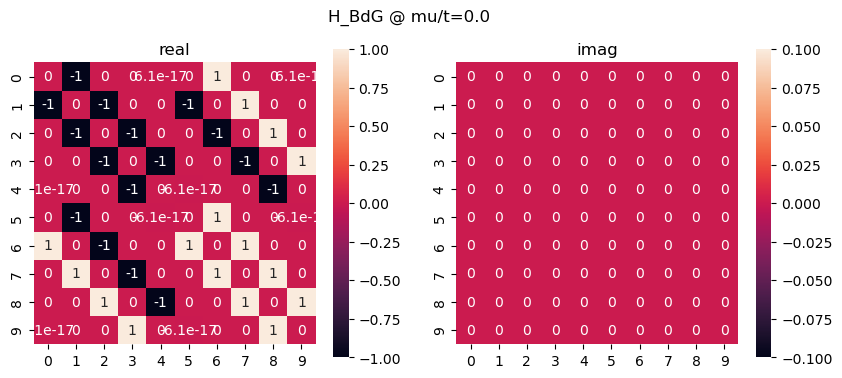

In [1]:
import numpy as np
from majorana_energies import H_BdG_constructor

model_params = {
    'nn_hopping': 1.0, 
    'cooper_pairing': 1.0, 
    'tuning_parameter': 'mu/t', 
    'parameter_space': np.linspace(0,3,51),
    'N_sites': 5,
}
H_constructor = H_BdG_constructor('kitaev', model_params, show_ham=True, plot_bands=False, plot_band_idxs=[0,1,2,3])
H_constructor.construct_and_solve_hamiltonians()

Constructing BdG Hamiltonian for Kitaev chain tuning on-site energy...
param idxs: [0, 0, 17, 33, 50]
subplot idxs: [2, 4, 6, 8, 10]


c:\Users\erica\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\erica\OneDrive\Desktop\repos\projects\majorana_energies.py:253: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


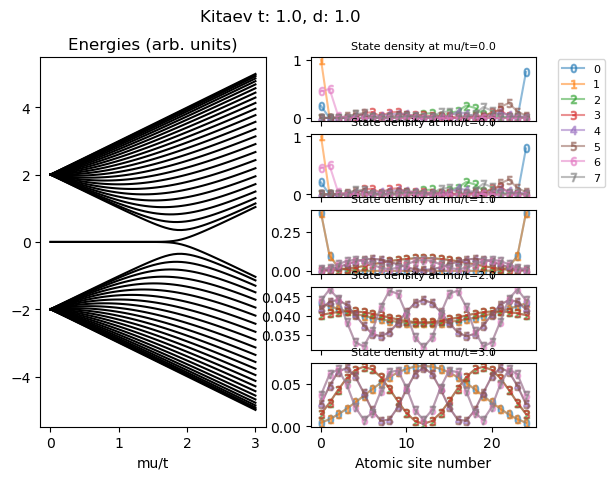

In [2]:
model_params['N_sites'] = 25
H_constructor = H_BdG_constructor('kitaev', model_params, plot_band_idxs=[0,1,2,3])
H_constructor.construct_and_solve_hamiltonians()
H_constructor.plot_figures(param_list=[0, .0001, 1, 2, 3])

On the left side we see the similar band structure plotted in Topocondmat! On the right side is the spatial distribution of the two lowest-energy Majorana pairs. 

For `mu/t=0`, the majoranas of each pair are spatially separated and we see the four distinct line colors. The majoranas of the lowest energy are at opposite ends of the chain! As `mu/t` increases, the "electron" and "hole" contributions to the density converge.

Constructing BdG Hamiltonian for Kitaev chain tuning on-site energy...


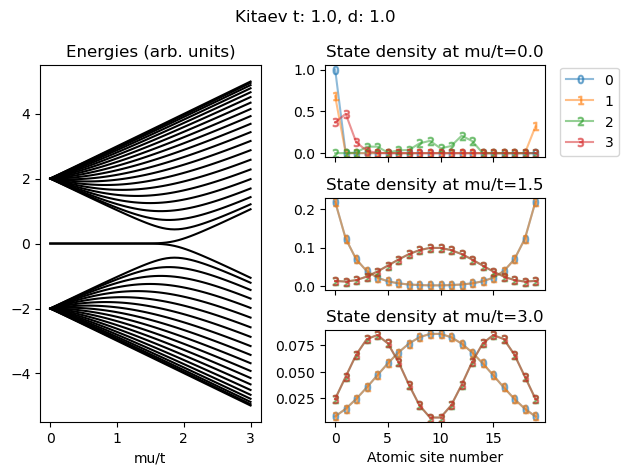

In [2]:
model_params = {
    'nn_hopping': 1.0, 
    'cooper_pairing': 1.0, 
    'tuning_parameter': 'mu/t', 
    'parameter_space': np.linspace(0.,3,51),
    'N_sites': 20
}
H_constructor = H_BdG_constructor('kitaev', model_params)
H_constructor.construct_and_solve_hamiltonians()
H_constructor.plot_figures(param_list=[0, 0.0001, .5, 1.5, 3.0])

Constructing BdG Hamiltonian for Kitaev chain tuning on-site energy...


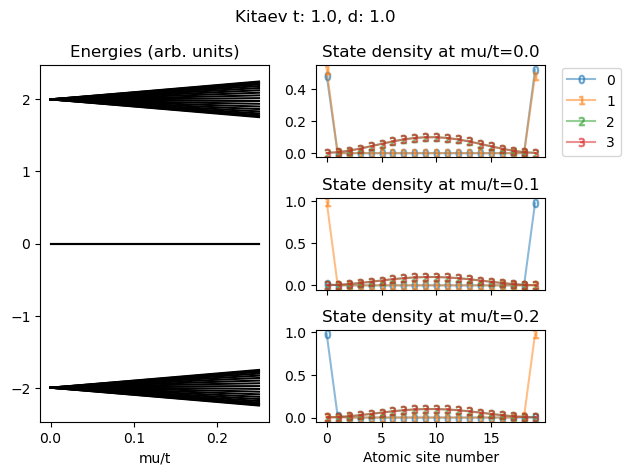

In [19]:
model_params['parameter_space'] = np.linspace(0.0001, 0.25, 51)
H_constructor = H_BdG_constructor('kitaev', model_params)
H_constructor.construct_and_solve_hamiltonians()
H_constructor.plot_figures()

With the increased number of sites, we see that the lowest- and second-lowest state densities ("converged" majoranas, aka basically electrons) look more and more like the densities for the ground and first excited states of an electron in a potential well.

Now let's see what happens when we make the potential well a periodic one by introducing hopping between the last and first site:

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


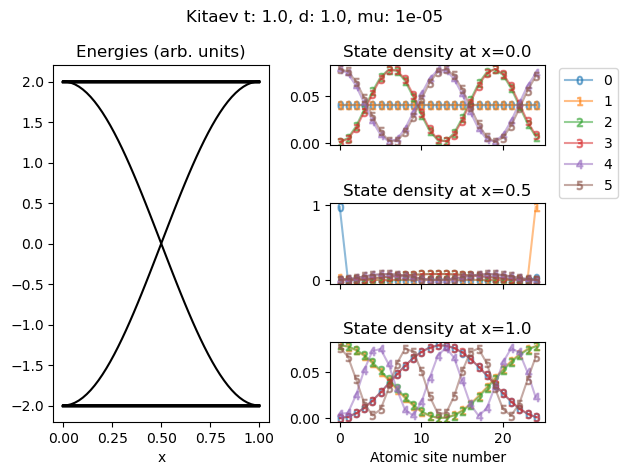

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


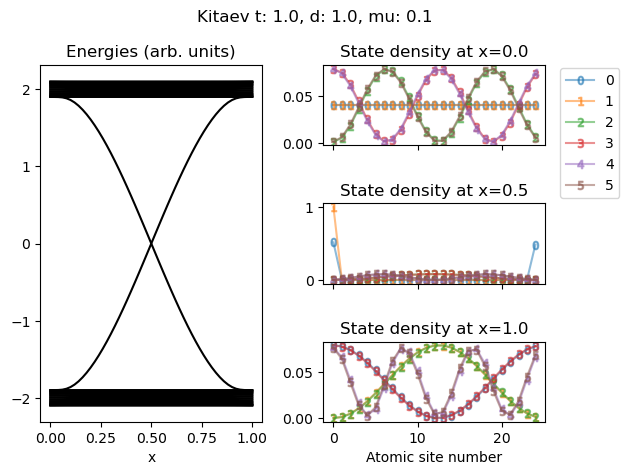

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


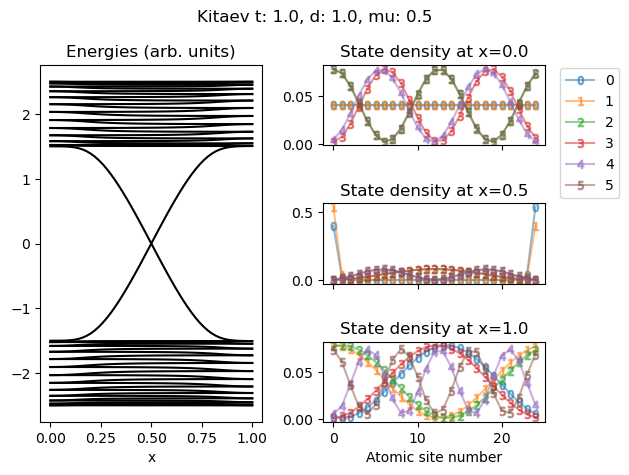

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


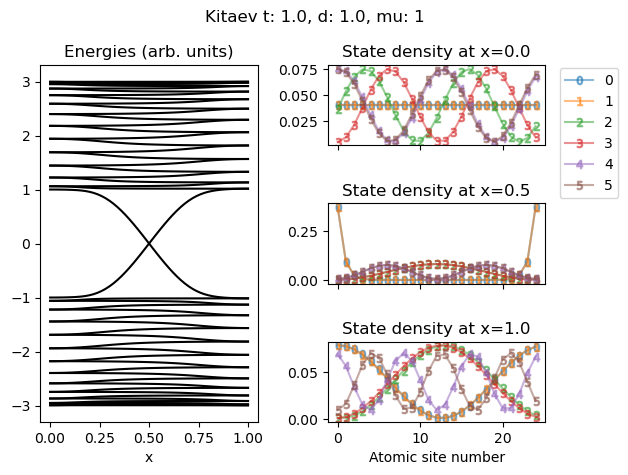

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


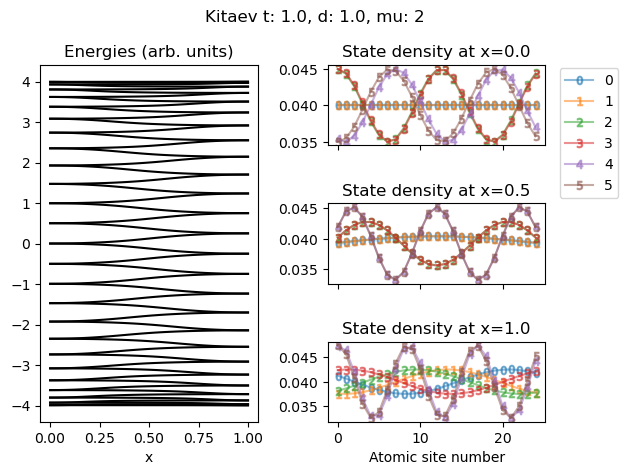

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


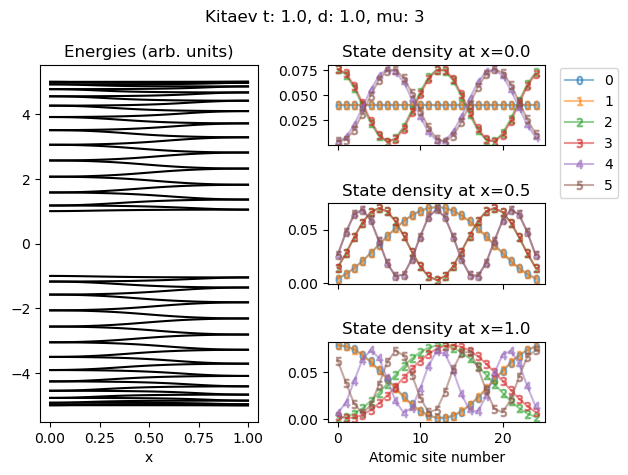

In [10]:
model_params = {
    'nn_hopping': 1.0, 
    'cooper_pairing': 1.0,
    'tuning_parameter': 'x', 
    'parameter_space': np.linspace(0.,1.,51),
    'N_sites': 25,
}

for mu in [0.00001, 0.1, 0.5, 1, 2, 3]:
    model_params['onsite_energy'] = mu
    H_constructor = H_BdG_constructor('kitaev', model_params, plot_band_idxs=[0,1,2])
    H_constructor.construct_and_solve_hamiltonians()
    H_constructor.plot_figures()